In [1]:
from griffis_soccer_analysis.fbref_code import *
import pandas as pd
from scipy import stats
import math
import numpy as np
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [14]:
comps = [ 
         'Copa de la Liga'
         
]
ssns = [
        '2023',
       ]

scrape_fbref_next12_leagues_players(comps = comps, seasons = ssns)

Working on Copa de la Liga
Done :) File named "Final FBRef Next 12 Leagues" is located at  c:/Users/Federico Rábanos/Documents/lanus stats/Python/


In [15]:
df = pd.read_csv('../Final FBRef Next 12 Leagues.csv')
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position
0,Aaron Anselmino,ar ARG,DF,Boca Juniors,Copa de la Liga,17,2005,3,3,251.0,...,6.738544,5.390836,1.449727,9.122334,5.193835,49.309915,32.369942,0.000000,1.937984,NaN
1,Aaron Nicolás Molinas,ar ARG,"MF,FW",Tigre,Copa de la Liga,22,2000,13,10,816.0,...,6.593407,9.890110,1.818035,8.808408,2.328466,47.153265,28.218884,2.467811,9.926471,NaN
2,Aaron Quirós,ar ARG,DF,Banfield,Copa de la Liga,21,2001,14,14,1260.0,...,14.358108,9.290541,1.085907,8.816819,2.223595,47.356443,19.038817,0.092421,2.755906,NaN
3,Abiel Osorio,ar ARG,"FW,MF",Vélez Sarsfield,Copa de la Liga,20,2002,9,1,195.0,...,11.673152,12.645914,0.897935,7.836971,3.093701,42.260209,20.786517,0.561798,5.405405,NaN
4,Adam Bareiro,py PAR,FW,San Lorenzo,Copa de la Liga,26,1996,12,11,1019.0,...,41.894353,51.001821,0.723950,7.124419,1.011771,39.069215,26.190476,1.378446,3.963415,Centre-Forward


In [16]:
list(df.columns)

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 'G+A',
 'Glsxx',
 'Goals',
 'Shots',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'AvgShotDistance',
 'FKShots',
 'PK',
 'PKsAtt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'npG-xG',
 'PassesCompleted',
 'PassesAttempted',
 'TotCmp%',
 'TotalPassDist',
 'ProgPassDist',
 'ShortPassCmp',
 'ShortPassAtt',
 'ShortPassCmp%',
 'MedPassCmp',
 'MedPassAtt',
 'MedPassCmp%',
 'LongPassCmp',
 'LongPassAtt',
 'LongPassCmp%',
 'Assists',
 'xAG',
 'xA',
 'A-xAG',
 'KeyPasses',
 'Final1/3Cmp',
 'PenAreaCmp',
 'CrsPenAreaCmp',
 'ProgPasses',
 'LivePass',
 'DeadPass',
 'FKPasses',
 'ThruBalls',
 'Switches',
 'Crs',
 'ThrowIn',
 'CK',
 'InSwingCK',
 'OutSwingCK',
 'StrCK',
 'Cmpxxx',
 'PassesToOff',
 'PassesBlocked',
 'SCA',
 'SCA90',
 'SCAPassLive',
 'SCAPassDead',
 'SCADrib',
 'SCASh',
 'SCAFld',
 'SCADef',
 'GCA',
 'GCA90',
 'GCAPassLive',
 'GCAPassDead',
 'GCADrib',
 'GCASh',
 'GCAFld',
 'GCADef',
 

In [17]:
df.Pos.value_counts()

Pos
DF       224
MF       174
FW,MF     93
FW        89
MF,FW     82
GK        43
DF,MF     37
MF,DF     17
DF,FW     12
FW,DF      5
Name: count, dtype: int64

In [18]:
df.Min.describe()

count     776.000000
mean      502.909794
std       408.346171
min         1.000000
25%       119.000000
50%       422.000000
75%       832.000000
max      1260.000000
Name: Min, dtype: float64

In [19]:
mediocampistas = df[(df['Pos'].str.contains('MF') == True) & (df['Min'] > 350)].reset_index(drop=True)

In [20]:
lista_valores = [
    'Player',
    'Squad',
    'TklWinPossPer90',
    'DrbTklPer90',
    'DrbTkl%Per90',
    'pAdjDrbPastPer90',
    'PassBlocksPer90',
    'IntPer90',
    'ClrPer90',
    'RecovPer90',
]

In [21]:
lista_valores_ofensivos = [
    'Player',
    'Squad',
    'npxGPer90',
    'SoTPer90',
    'SCAPer90',
    'AttPenTouchPer90',
    'CarriesToPenAreaPer90',
    'xAGPer90'
]

In [22]:
medios_test = mediocampistas[lista_valores_ofensivos].reset_index(drop=True).fillna(0)
medios_test.isna().sum()

Player                   0
Squad                    0
npxGPer90                0
SoTPer90                 0
SCAPer90                 0
AttPenTouchPer90         0
CarriesToPenAreaPer90    0
xAGPer90                 0
dtype: int64

In [23]:
medios_test = mediocampistas[lista_valores_ofensivos].reset_index(drop=True).fillna(0)

params = list(medios_test.columns)
params = params[2:]


jugadores = list(medios_test.Player.unique())
df_ponderado = pd.DataFrame(columns=['Nombre', 'KPI'])

for jugador in jugadores:
    player = medios_test.loc[medios_test['Player'] == jugador].reset_index()
    player = list(player.loc[0])
    player = player[3:]
    
    values = []
    for x in range(len(params)):   
        values.append(math.floor(stats.percentileofscore(medios_test[params[x]],player[x])))
    diccionario = {}
    diccionario = {
        jugador: np.mean(values)
    }
    df = pd.DataFrame(list(diccionario.items()), columns=['Nombre', 'KPI'])
    df_ponderado = pd.concat([df_ponderado, df])

In [24]:
player = medios_test.loc[medios_test['Player'] == 'Pablo Solari'].reset_index()
player = list(player.loc[0])
player = player[3:]

values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(medios_test[params[x]],player[x])))
values

[100, 99, 77, 98, 94, 100]

In [25]:
np.mean(values)

94.66666666666667

In [26]:
df_ponderado.sort_values(by='KPI', ascending=False).head(30)

,Nombre,KPI
0,Pablo Solari,94.666667
0,Ramón Sosa,93.833333
0,Geronimo Rivera,93.333333
0,Facundo Colidio,93.000000
0,Valentín Depietri,91.500000
0,Exequiel Zeballos,90.333333
0,Mateo Sanabria,89.333333
0,Mateo Coronel,89.000000
0,Pedro De la Vega,86.000000
0,Matías Giménez,85.666667


In [27]:
df_plot = df_ponderado.sort_values(by='KPI', ascending=False).head(15)
df_plot['KPI'] = round(df_plot['KPI'],2)

In [28]:
#Video McKay Johns: https://www.youtube.com/watch?v=3HVT0lHaIKg&t=1478s&ab_channel=McKayJohns
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"
import matplotlib

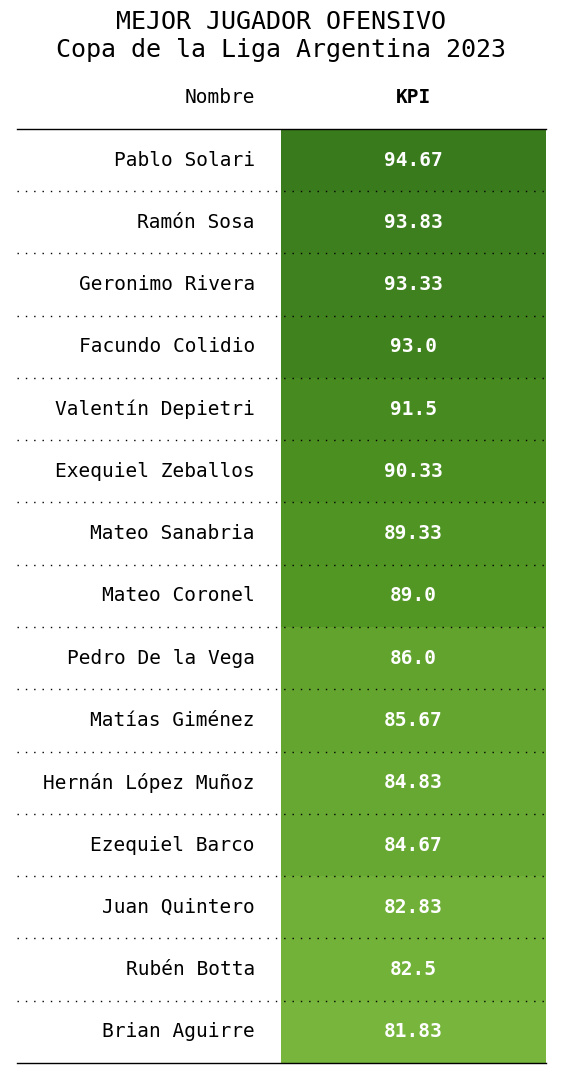

In [31]:

col_defs = [
    ColumnDefinition(
        name="Jugador",
        textprops={"ha": "right"},
        width=5
        ),
    ColumnDefinition(
        name="KPI",
        textprops={"ha": "center", "color": "#000000", "weight": "bold"},
        cmap=normed_cmap(df_ponderado["KPI"], cmap=matplotlib.cm.PiYG, num_stds=2)
    )
]

fig, ax = plt.subplots(figsize=(7, 13))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_plot,
    column_definitions=col_defs,
    index_col="Nombre",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 3, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["Nombre", "KPI"]) # This will set the font color of the columns based on the cmap so the text is readable

plt.title('MEJOR JUGADOR OFENSIVO\nCopa de la Liga Argentina 2023', size=18)
plt.savefig('thumbnail.png', dpi=300, transparent=True)